In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('march-machine-learning-mania-2023/MLCleanedData.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107634 entries, 0 to 107633
Data columns (total 89 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   107634 non-null  int64  
 1   Season       107634 non-null  int64  
 2   DayNum       107634 non-null  int64  
 3   WTeamID      107634 non-null  int64  
 4   WScore       107634 non-null  int64  
 5   LTeamID      107634 non-null  int64  
 6   LScore       107634 non-null  int64  
 7   WLoc         107634 non-null  object 
 8   NumOT        107634 non-null  int64  
 9   WFGM         107634 non-null  int64  
 10  WFGA         107634 non-null  int64  
 11  WFGM3        107634 non-null  int64  
 12  WFGA3        107634 non-null  int64  
 13  WFTM         107634 non-null  int64  
 14  WFTA         107634 non-null  int64  
 15  WOR          107634 non-null  int64  
 16  WDR          107634 non-null  int64  
 17  WAst         107634 non-null  int64  
 18  WTO          107634 non-

Unnamed: 0  Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  \
0          16    2003      19     1257      65     1102      47    H      0   
1           1    2003      22     1102      72     1391      43    H      0   
2           2    2003      25     1102      57     1117      52    A      0   
3          21    2003      27     1399      60     1102      47    H      0   
4           3    2003      31     1102      65     1410      44    H      0   
5           4    2003      34     1102      70     1204      56    A      0   
6           5    2003      37     1102      85     1125      76    H      0   
7          18    2003      48     1324      61     1102      44    H      0   
8          22    2003      53     1412      69     1102      59    N      0   
9           6    2003      54     1102      63     1431      45    A      0   

   WFGM  ...  poLAVGFGA3  poLAVGFTM  poLAVGFTA   poLAVGOR   poLAVGDR  \
0    23  ...    0.000000   0.000000   0.000000   0.000000   0.000000   
1    26  ...   16.000000  20.000000  28.000000  25.000000  36.000000   
2    16  ...   19.500000  15.500000  20.000000   8.500000  22.000000   
3    20  ...   12.666667  13.000000  18.666667  10.666667  19.333333   
4    23  ...   14.800000  13.000000  19.000000  10.400000  28.600000   
5    24  ...   23.000000  12.250000  20.250000  13.750000  24.000000   
6    26  ...   19.000000  14.750000  22.000000  11.000000  27.250000   
7    17  ...   13.428571  12.428571  15.714286  11.285714  19.000000   
8    23  ...   13.125000  13.625000  17.750000  11.000000  19.500000   
9    21  ...   20.142860   9.000000  14.000000  10.714290  20.000000   

   poLAVGAst   poLAVGTO  poLAVGBlk   poLAVGPF  LGN  
0   0.000000   0.000000   0.000000   0.000000    1  
1  21.000000  26.000000  12.000000  18.000000    2  
2  15.000000  20.000000   2.000000  20.500000    3  
3   8.333333  11.000000   1.333333  18.000000    4  
4  15.400000  13.800000   3.600000  17.600000    6  
5  18.250000  17.750000   5.250000  21.250000    5  
6  18.000000  17.000000   9.000000  15.250000    5  
7   9.142857  12.714286   0.857143  17.857143    8  
8   9.250000  12.625000   1.125000  17.625000    9  
9  14.571430  12.000000   3.142857  15.571430    8  

[10 rows x 89 columns]

Text(0, 0.5, 'Winning Score')

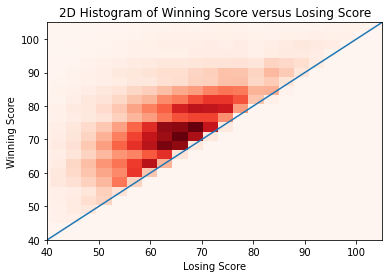

In [24]:
plt.hist2d(df['LScore'], df['WScore'], bins=42, cmap=plt.cm.Reds)
plt.axline((0, 0), slope=1)
plt.xlim([40, 105])
plt.ylim([40, 105])
plt.title('2D Histogram of Winning Score versus Losing Score')
plt.xlabel('Losing Score')
plt.ylabel('Winning Score')

Text(0, 0.5, 'Winning FGM3')

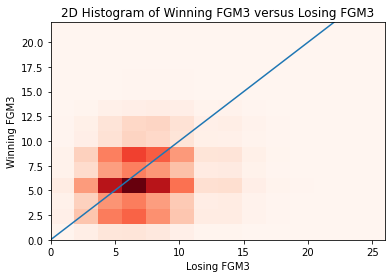

In [25]:
plt.hist2d(df['WFGM3'], df['LFGM3'], bins=14, cmap=plt.cm.Reds)
plt.axline((0, 0), slope=1)
plt.title('2D Histogram of Winning FGM3 versus Losing FGM3')
plt.xlabel('Losing FGM3')
plt.ylabel('Winning FGM3')

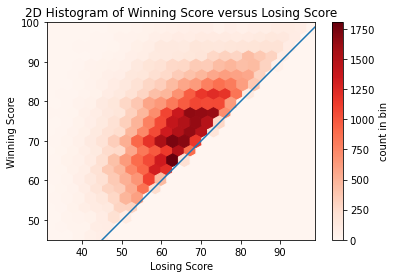

In [40]:
plt.hexbin(df['LScore'], df['WScore'], gridsize=42, cmap=plt.cm.Reds)
plt.axline((0, 0), slope=1)
plt.axis('equal')
plt.xlim([40, 90])
plt.ylim([45, 100])
plt.title('2D Histogram of Winning Score versus Losing Score')
plt.xlabel('Losing Score')
plt.ylabel('Winning Score')
cb = plt.colorbar(label='count in bin')

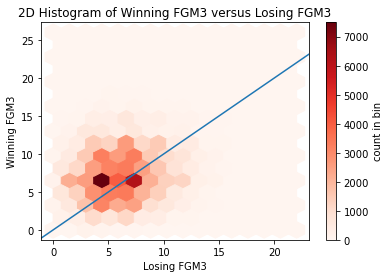

In [41]:
plt.hexbin(df['LFGM3'], df['WFGM3'], gridsize=15, cmap=plt.cm.Reds)
plt.axline((0, 0), slope=1)
plt.title('2D Histogram of Winning FGM3 versus Losing FGM3')
plt.xlabel('Losing FGM3')
plt.ylabel('Winning FGM3')
cb = plt.colorbar(label='count in bin')